<a href="https://colab.research.google.com/github/bonareri/Python-Data-Analysis/blob/main/Global_Youtube_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
!pip install kaggle


In [6]:
#getting kaggle dataset
!kaggle datasets download  -d nelgiriyewithana/global-youtube-statistics-2023

Dataset URL: https://www.kaggle.com/datasets/nelgiriyewithana/global-youtube-statistics-2023
License(s): other
global-youtube-statistics-2023.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
import zipfile
zipfile_path = '/content/global-youtube-statistics-2023.zip'
csv_file = zipfile_path.replace('zip', '')
with zipfile.ZipFile(zipfile_path, 'r') as file:
  file.extractall()
  print('Done')


Done


In [8]:
youtube = pd.read_csv('/content/Global YouTube Statistics.csv', encoding='latin-1')

In [9]:
#make copies of the dataset
youtube_copy = youtube.copy()

In [10]:
youtube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

In [11]:
#PERCENTAGE OF NULL VALUES
youtube.isnull().sum()/len(youtube)*100

,0
rank,0.000000
Youtuber,0.000000
subscribers,0.000000
video views,0.000000
category,4.623116
Title,0.000000
uploads,0.000000
Country,12.261307
Abbreviation,12.261307
channel_type,3.015075


In [12]:
#drop rows in Country where the value is null
youtube.dropna(subset=['Country'], inplace=True)

In [13]:
#check for null values in Country
youtube['Country'].isnull().sum()

0

In [14]:
#dropping columns Abbbreviation, Population,video_views_for_the_last_30_days,subscribers_for_last_30_days
youtube.drop(['Abbreviation', 'Population','video_views_for_the_last_30_days','subscribers_for_last_30_days'], axis=1, inplace=True)


In [15]:
#drop the missing values in created_year,created_month,created_date
youtube.dropna(subset=['created_year', 'created_month', 'created_date'], inplace=True)

In [16]:
#drop the row with missing values in Gross tertiary education enrollment (%), Unemployment rate ,Urban_population ,Latitude ,Longitude
youtube.dropna(subset=['Gross tertiary education enrollment (%)', 'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'], inplace=True)

In [17]:
youtube.info()

<class 'pandas.core.frame.DataFrame'>
Index: 869 entries, 0 to 994
Data columns (total 24 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     869 non-null    int64  
 1   Youtuber                                 869 non-null    object 
 2   subscribers                              869 non-null    int64  
 3   video views                              869 non-null    float64
 4   category                                 830 non-null    object 
 5   Title                                    869 non-null    object 
 6   uploads                                  869 non-null    int64  
 7   Country                                  869 non-null    object 
 8   channel_type                             863 non-null    object 
 9   video_views_rank                         869 non-null    float64
 10  country_rank                             869 non-null  

<Axes: >

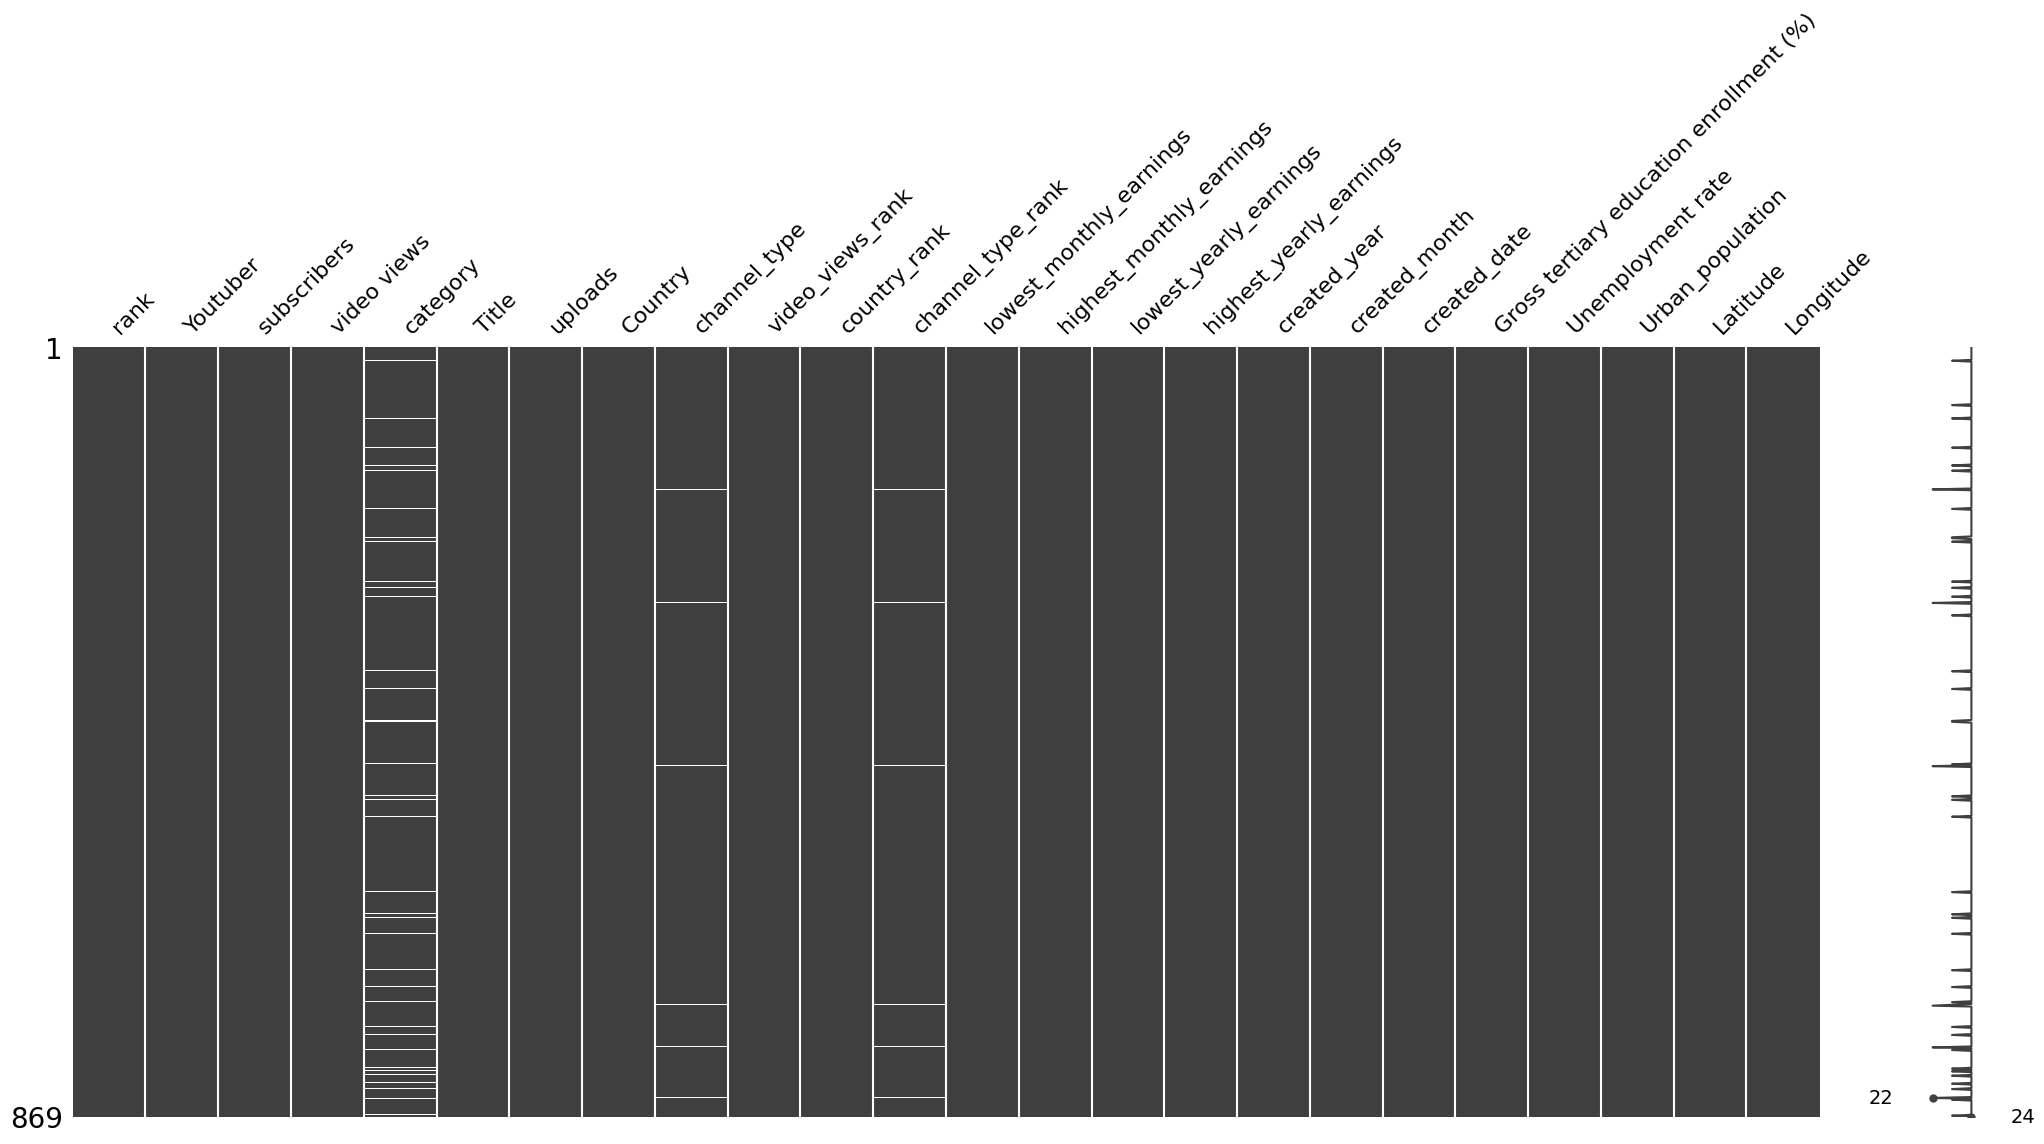

In [18]:
#create a missigno matrix
import missingno as msno
msno.matrix(youtube)

In [19]:
#Find the mode for channel_type
youtube['channel_type'].mode()
#Fill in the missing values with the mode
youtube['channel_type'].fillna('Entertainment', inplace=True)

<ipython-input-19-ab23605ee001>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  youtube['channel_type'].fillna('Entertainment', inplace=True)


In [20]:
#FIND MODE FOR CATEGORY
youtube['category'].mode()
#Fill in the missing values with the mode
youtube['category'].fillna('Music', inplace=True)

<ipython-input-20-855caa62d36c>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  youtube['category'].fillna('Music', inplace=True)


In [21]:
youtube.head(5)

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,channel_type,video_views_rank,...,lowest_yearly_earnings,highest_yearly_earnings,created_year,created_month,created_date,Gross tertiary education enrollment (%),Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,Music,1.0,...,6800000.00,1.084000e+08,2006.0,Mar,13.0,28.1,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,Games,4055159.0,...,0.04,5.800000e-01,2006.0,Mar,5.0,88.2,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,Entertainment,48.0,...,4000000.00,6.470000e+07,2012.0,Feb,20.0,88.2,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,Education,2.0,...,5900000.00,9.480000e+07,2006.0,Sep,1.0,88.2,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,Entertainment,3.0,...,5500000.00,8.750000e+07,2006.0,Sep,20.0,28.1,5.36,471031528.0,20.593684,78.962880


In [22]:
# Map months to numeric values
month_map = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
    'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}
# Convert 'created_month' to month numbers
youtube['created_month_num'] = youtube['created_month'].map(month_map)
# Convert to datetime with proper year, month, and day columns
youtube['created_datetime'] = pd.to_datetime(
    youtube['created_year'].astype(int).astype(str) + '-' +
    youtube['created_month_num'].astype(str) + '-' +
    youtube['created_date'].astype(int).astype(str),
    errors='coerce'
)
# Display the dataframe to verify
print(youtube)

     rank                    Youtuber  subscribers   video views  \
0       1                    T-Series    245000000  2.280000e+11   
1       2              YouTube Movies    170000000  0.000000e+00   
2       3                     MrBeast    166000000  2.836884e+10   
3       4  Cocomelon - Nursery Rhymes    162000000  1.640000e+11   
4       5                   SET India    159000000  1.480000e+11   
..    ...                         ...          ...           ...   
990   991               Natan por Aï¿     12300000  9.029610e+09   
991   992    Free Fire India Official     12300000  1.674410e+09   
992   993                       Panda     12300000  2.214684e+09   
993   994                 RobTopGames     12300000  3.741235e+08   
994   995                Make Joke Of     12300000  2.129774e+09   

             category                       Title  uploads         Country  \
0               Music                    T-Series    20082           India   
1    Film & Animation      

In [23]:
youtube

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,channel_type,video_views_rank,...,created_year,created_month,created_date,Gross tertiary education enrollment (%),Unemployment rate,Urban_population,Latitude,Longitude,created_month_num,created_datetime
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,Music,1.0,...,2006.0,Mar,13.0,28.1,5.36,471031528.0,20.593684,78.962880,3,2006-03-13
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,Games,4055159.0,...,2006.0,Mar,5.0,88.2,14.70,270663028.0,37.090240,-95.712891,3,2006-03-05
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,Entertainment,48.0,...,2012.0,Feb,20.0,88.2,14.70,270663028.0,37.090240,-95.712891,2,2012-02-20
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,Education,2.0,...,2006.0,Sep,1.0,88.2,14.70,270663028.0,37.090240,-95.712891,9,2006-09-01
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,Entertainment,3.0,...,2006.0,Sep,20.0,28.1,5.36,471031528.0,20.593684,78.962880,9,2006-09-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,Natan por Aï¿,12300000,9.029610e+09,Sports,Natan por Aï¿,1200,Brazil,Entertainment,525.0,...,2017.0,Feb,12.0,51.3,12.08,183241641.0,-14.235004,-51.925280,2,2017-02-12
991,992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,Games,6141.0,...,2018.0,Sep,14.0,28.1,5.36,471031528.0,20.593684,78.962880,9,2018-09-14
992,993,Panda,12300000,2.214684e+09,Music,HybridPanda,2452,United Kingdom,Games,129005.0,...,2006.0,Sep,11.0,60.0,3.85,55908316.0,55.378051,-3.435973,9,2006-09-11
993,994,RobTopGames,12300000,3.741235e+08,Gaming,RobTopGames,39,Sweden,Games,35112.0,...,2012.0,May,9.0,67.0,6.48,9021165.0,60.128161,18.643501,5,2012-05-09


In [24]:
#median for the channel_type_rank
median_typerank=youtube['channel_type_rank'].median()
#fill in the null values with the median
youtube['channel_type_rank'].fillna(median_typerank, inplace=True)


<ipython-input-24-e69f36d4636b>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  youtube['channel_type_rank'].fillna(median_typerank, inplace=True)


# **Visualization**

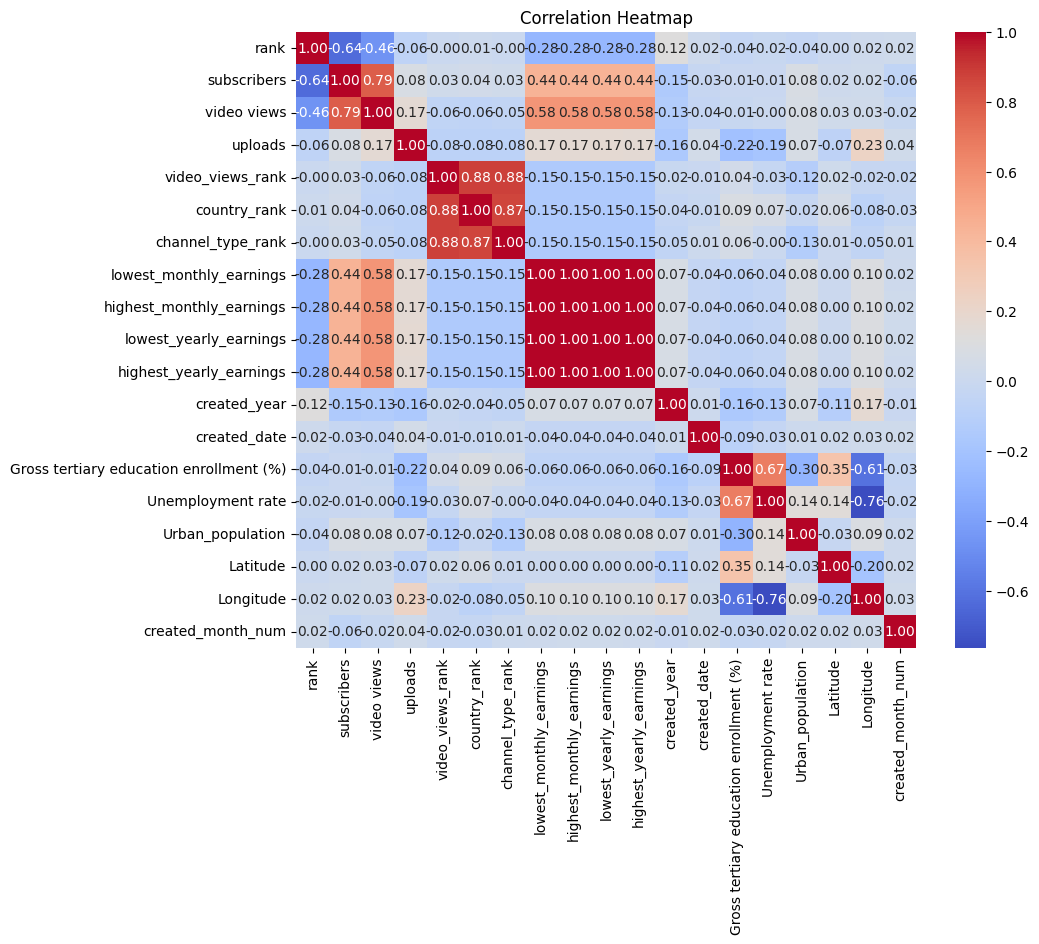

In [25]:
#correlation heatmap for values with numerical data
numeric_columns = youtube.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [27]:
#distribution of successful YouTube channels on a world map
import folium
import pandas as pd

world_map = folium.Map(location=[0, 0], zoom_start=2)
for index, row in youtube.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=5,  # Customize size based on `subscribers` or another metric
        popup=f"Youtuber: {row['Youtuber']}<br>Subscribers: {row['subscribers']}",
        color='blue',
        fill=True,
        fill_color='blue'
    ).add_to(world_map)
    world_map.save("youtube_channels_map.html")



KeyboardInterrupt: 

In [28]:
youtube.columns

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'channel_type', 'video_views_rank',
       'country_rank', 'channel_type_rank', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'created_year', 'created_month',
       'created_date', 'Gross tertiary education enrollment (%)',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude',
       'created_month_num', 'created_datetime'],
      dtype='object')

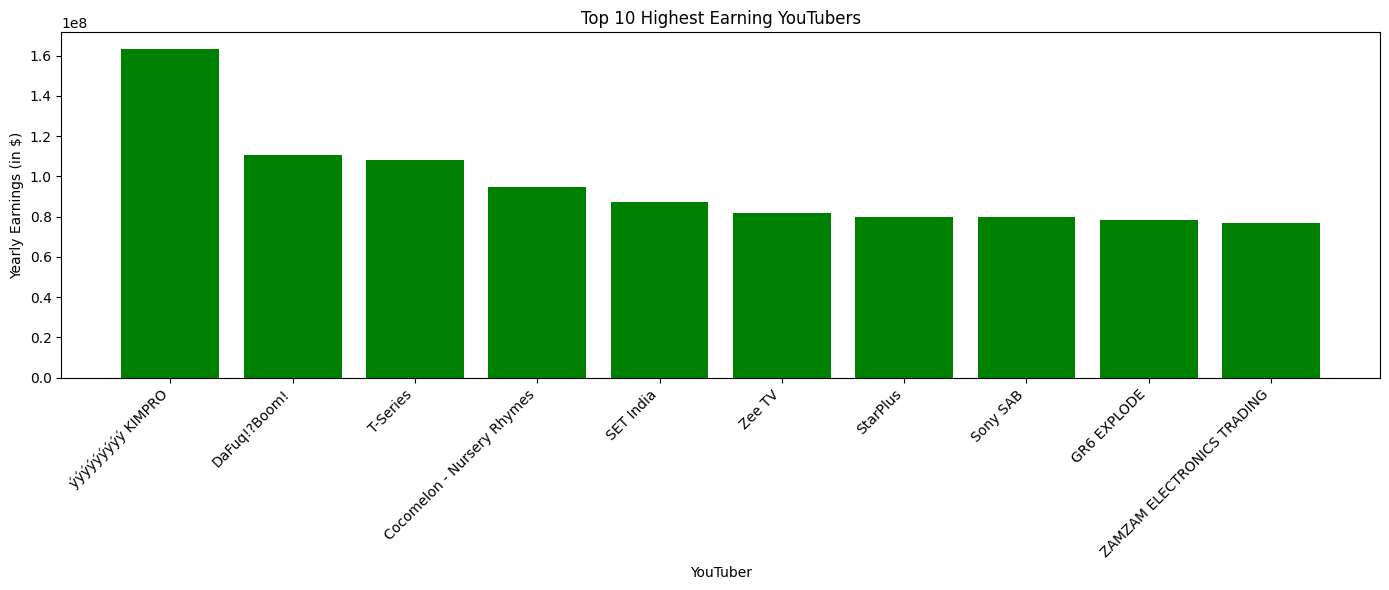

In [30]:
top_earning = youtube.sort_values(by='highest_yearly_earnings', ascending=False).head(10)
plt.figure(figsize=(14, 6))
plt.bar(top_earning['Youtuber'], top_earning['highest_yearly_earnings'], color='green')
plt.title('Top 10 Highest Earning YouTubers')
plt.xlabel('YouTuber')
plt.ylabel('Yearly Earnings (in $)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

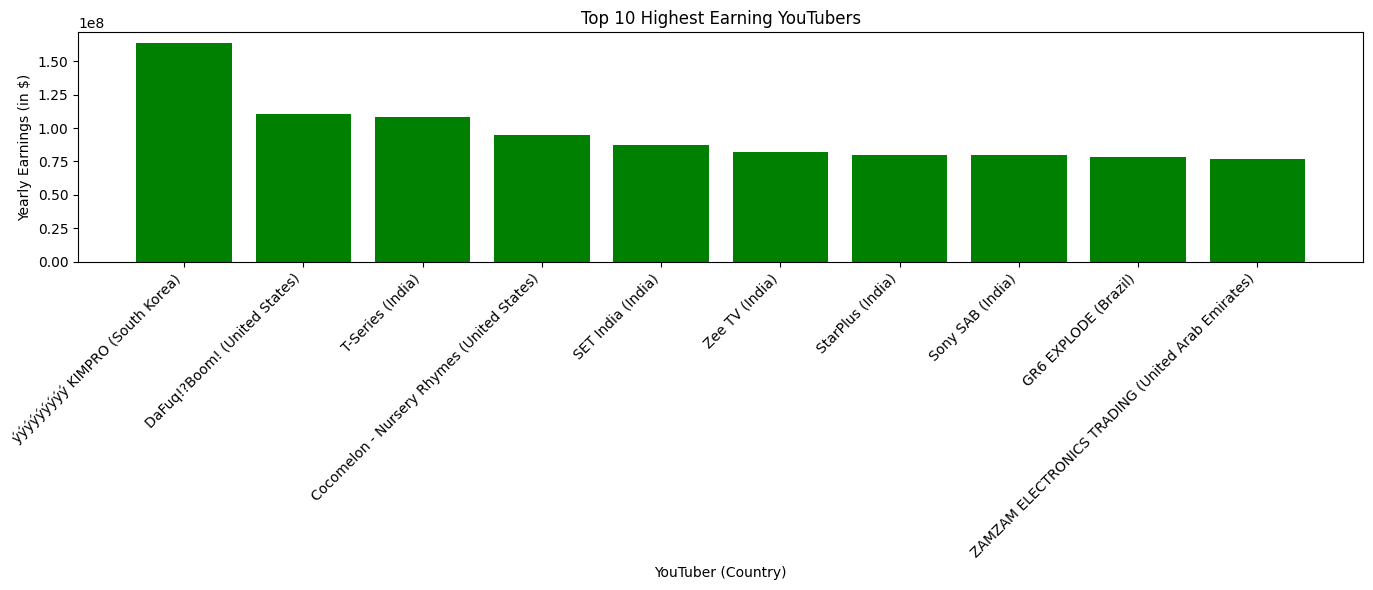

In [35]:
top_earning = youtube.sort_values(by='highest_yearly_earnings', ascending=False).head(10)
plt.figure(figsize=(14, 6))
plt.bar(top_earning['Youtuber'] + " (" + top_earning['Country'] + ")",
        top_earning['highest_yearly_earnings'], color='green')
plt.title('Top 10 Highest Earning YouTubers')
plt.xlabel('YouTuber (Country)')
plt.ylabel('Yearly Earnings (in $)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

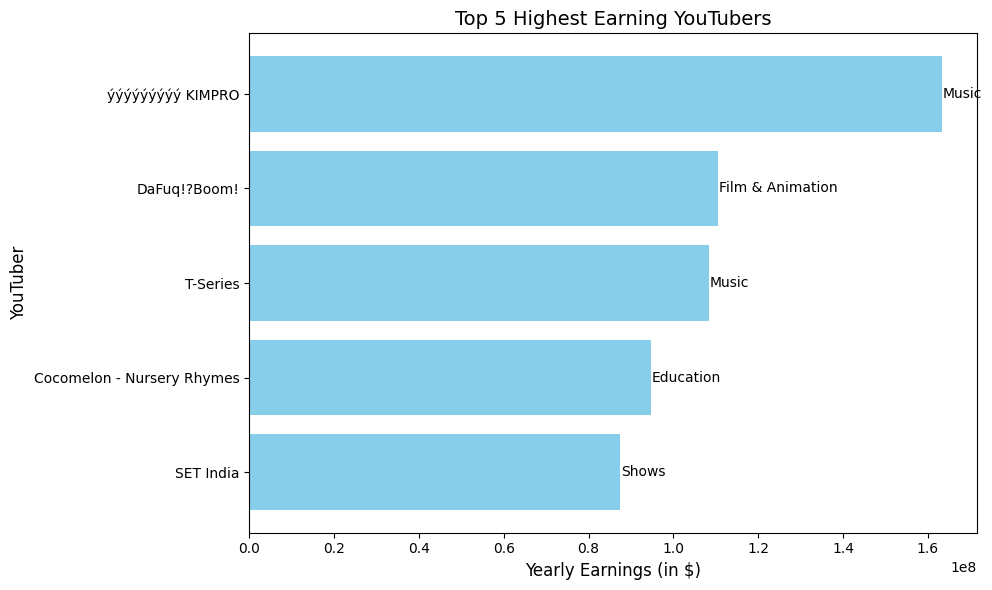

Top 5 Highest Earning YouTubers and their Categories:
SET India - Category: Shows
Cocomelon - Nursery Rhymes - Category: Education
T-Series - Category: Music
DaFuq!?Boom! - Category: Film & Animation
ýýýýýýýýý KIMPRO - Category: Music


In [51]:
# Sort to get the top 5 highest-earning YouTubers
top_earning = youtube.sort_values(by='highest_yearly_earnings', ascending=False).head(5)

# Sort the data for horizontal bar chart (descending order for bar alignment)
top_earning = top_earning.sort_values(by='highest_yearly_earnings', ascending=True)

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_earning['Youtuber'],
         top_earning['highest_yearly_earnings'], color='skyblue')
plt.title('Top 5 Highest Earning YouTubers', fontsize=14)
plt.xlabel('Yearly Earnings (in $)', fontsize=12)
plt.ylabel('YouTuber', fontsize=12)

# Annotate each bar with the category
for i, (earnings, category) in enumerate(zip(top_earning['highest_yearly_earnings'], top_earning['category'])):
    plt.text(earnings + 1e5, i, category, va='center', fontsize=10)

plt.tight_layout()
plt.show()

# Print the names of the YouTubers and their categories
print("Top 5 Highest Earning YouTubers and their Categories:")
for i, row in top_earning.iterrows():
    print(f"{row['Youtuber']} - Category: {row['category']}")

In [48]:
youtube.columns

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'channel_type', 'video_views_rank',
       'country_rank', 'channel_type_rank', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'created_year', 'created_month',
       'created_date', 'Gross tertiary education enrollment (%)',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude',
       'created_month_num', 'created_datetime'],
      dtype='object')

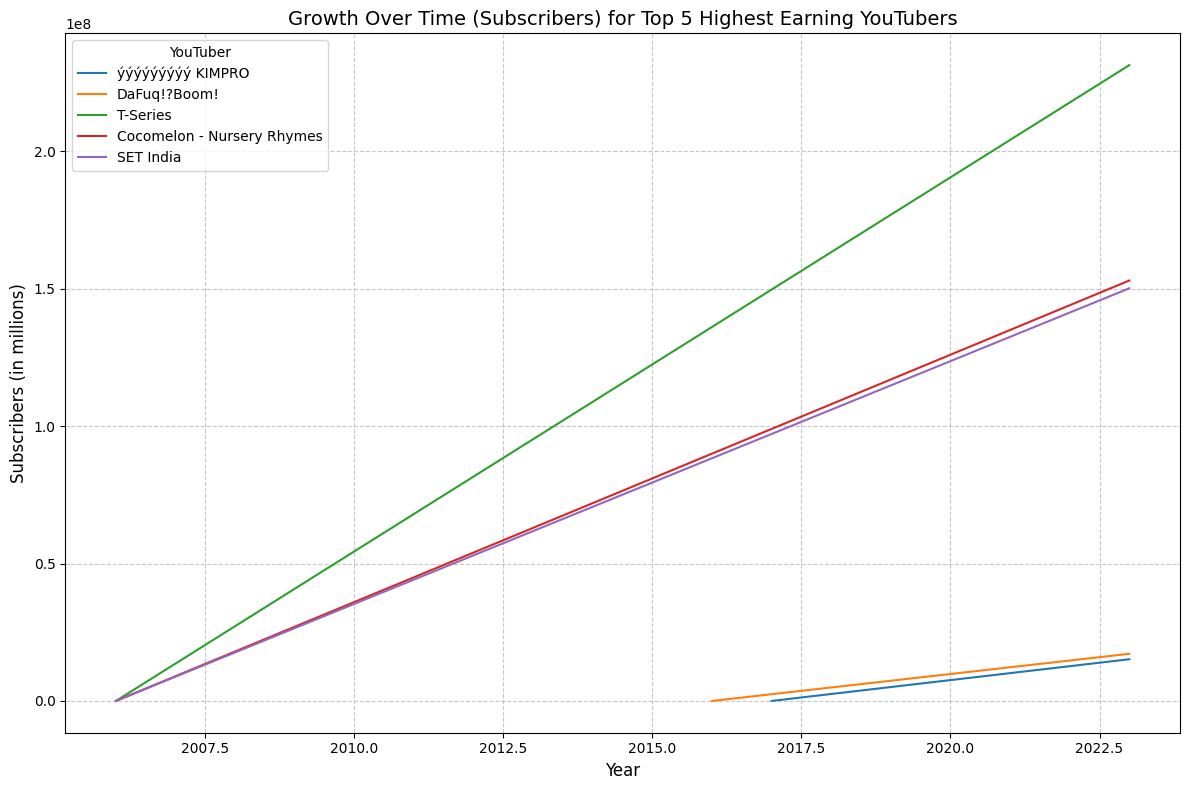

In [50]:
import math

# Filter the data for the top 5 highest-earning YouTubers
top_earning = youtube.sort_values(by='highest_yearly_earnings', ascending=False).head(5)

# Mock growth data: Use created_year and current subscribers for linear interpolation
growth_data = []
for _, row in top_earning.iterrows():
    # Extract the year and convert to integer (remove the decimal part)
    years = list(range(int(math.floor(row['created_year'])), 2024))  # Remove decimal part using floor
    subscribers_per_year = row['subscribers'] / (2024 - row['created_year'])
    yearly_subscribers = [subscribers_per_year * (year - row['created_year']) for year in years]
    growth_data.append((row['Youtuber'], years, yearly_subscribers))

# Plot growth over time using actual years from 'created_year'
plt.figure(figsize=(12, 8))
for youtuber, years, yearly_subscribers in growth_data:
    plt.plot(years, yearly_subscribers, label=youtuber)

# Add chart elements
plt.title('Growth Over Time (Subscribers) for Top 5 Highest Earning YouTubers', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Subscribers (in millions)', fontsize=12)
plt.legend(title='YouTuber', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

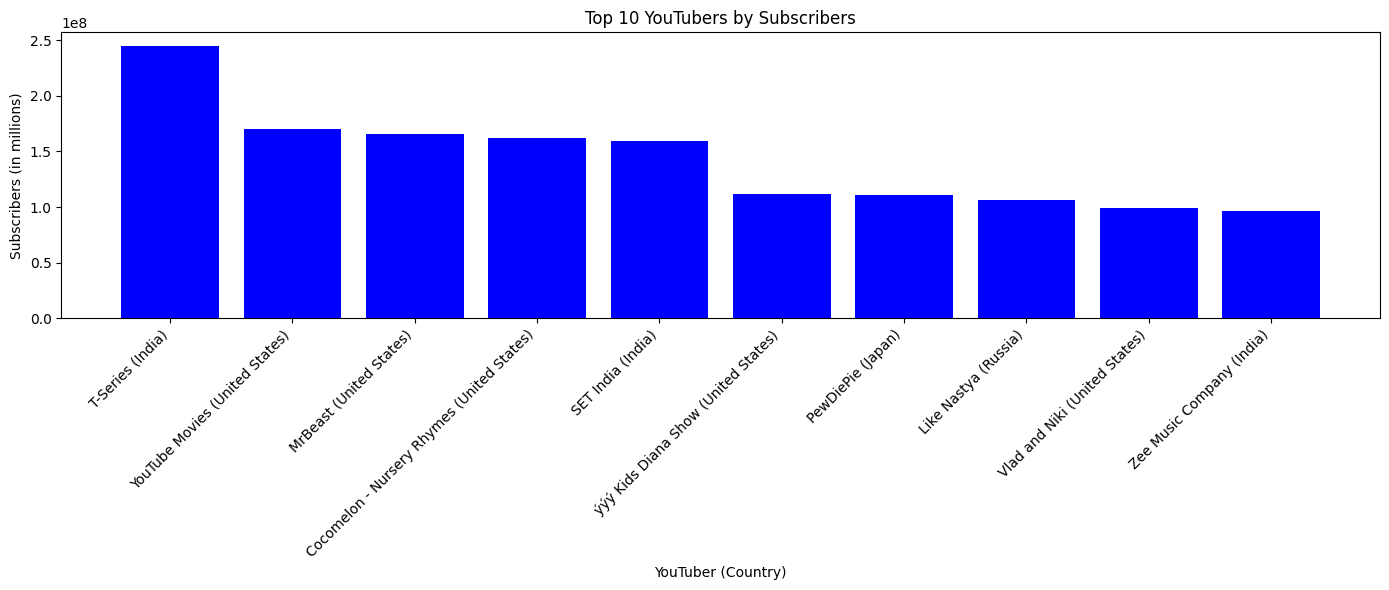

In [34]:
# Sort data to get the highest subscriber counts
top_subscribers = youtube.sort_values(by='subscribers', ascending=False).head(10)

# Plot top 10 YouTubers by subscribers with countries
plt.figure(figsize=(14, 6))
plt.bar(top_subscribers['Youtuber'] + " (" + top_subscribers['Country'] + ")",
        top_subscribers['subscribers'], color='blue')
plt.title('Top 10 YouTubers by Subscribers')
plt.xlabel('YouTuber (Country)')
plt.ylabel('Subscribers (in millions)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'youtubers' is your DataFrame
# Select relevant numerical columns for correlation analysis
columns = ['Gross tertiary education enrollment (%)', 'Unemployment rate', 'Urban_population', 'subscribers', 'video views']

# Calculate the correlation matrix
corr_matrix = youtuber[columns].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={'shrink': 0.8})

# Add title
plt.title('Correlation Heatmap of Key Metrics in YouTube Data', fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()

TypeError: string indices must be integers

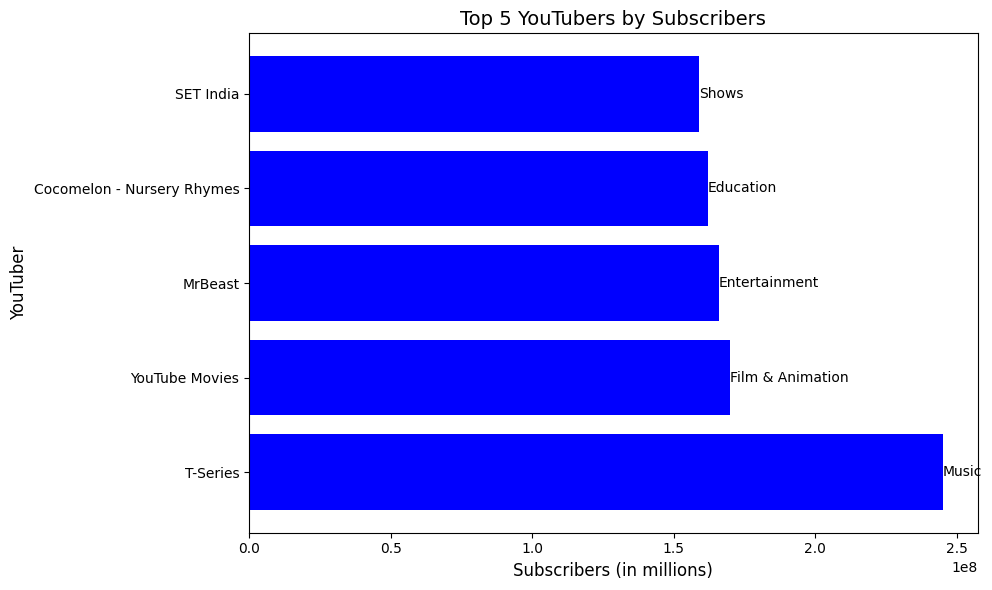

In [46]:
# Sort data to get the highest subscriber counts and get the top 5
top_subscribers = youtube.sort_values(by='subscribers', ascending=False).head(5)

# Plot top 5 YouTubers by subscribers with categories using horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_subscribers['Youtuber'],
         top_subscribers['subscribers'], color='blue')
plt.title('Top 5 YouTubers by Subscribers', fontsize=14)
plt.xlabel('Subscribers (in millions)', fontsize=12)
plt.ylabel('YouTuber', fontsize=12)

# Annotate each bar with the category
for i, (youtuber, subscribers, category) in enumerate(zip(top_subscribers['Youtuber'],
                                                          top_subscribers['subscribers'],
                                                          top_subscribers['category'])):
    plt.text(subscribers + 10, i, category, va='center', fontsize=10)

plt.tight_layout()
plt.show()

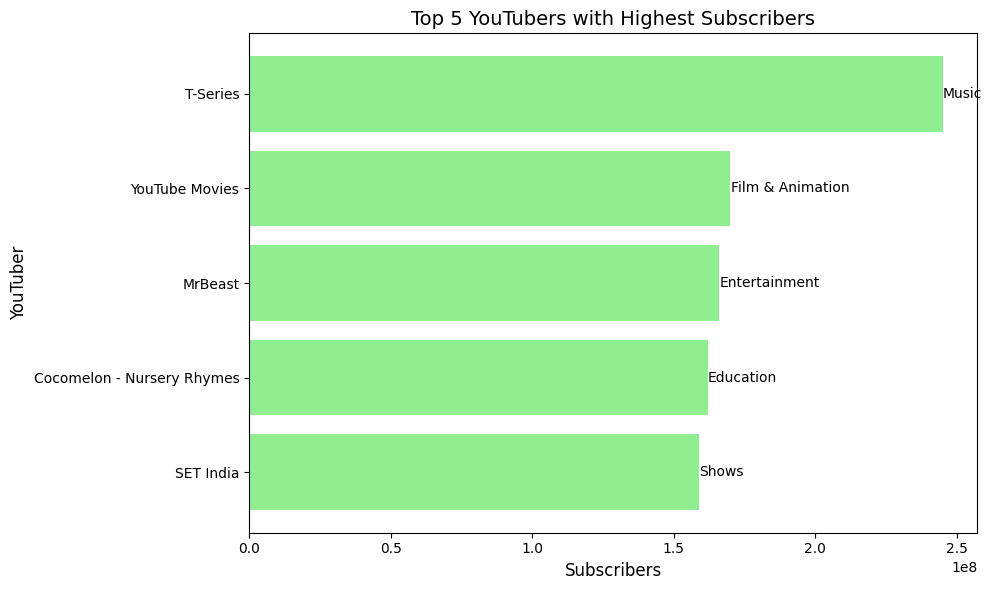

In [53]:
# Sort to get the top 5 YouTubers with the highest subscribers
top_subscribers = youtube.sort_values(by='subscribers', ascending=False).head(5)

# Sort the data for horizontal bar chart (descending order for bar alignment)
top_subscribers = top_subscribers.sort_values(by='subscribers', ascending=True)

# Create a horizontal bar chart for highest subscribers
plt.figure(figsize=(10, 6))
plt.barh(top_subscribers['Youtuber'],
         top_subscribers['subscribers'], color='lightgreen')
plt.title('Top 5 YouTubers with Highest Subscribers', fontsize=14)
plt.xlabel('Subscribers', fontsize=12)
plt.ylabel('YouTuber', fontsize=12)

# Annotate each bar with the category
for i, (subs, category) in enumerate(zip(top_subscribers['subscribers'], top_subscribers['category'])):
    plt.text(subs + 1e5, i, category, va='center', fontsize=10)

plt.tight_layout()
plt.show()

In [54]:
earnings_by_country = youtube.groupby('Country')[['highest_yearly_earnings', 'lowest_yearly_earnings']].sum().reset_index()
subscribers_by_country = youtube.groupby('Country')['subscribers'].sum().reset_index()

In [55]:
# Get the top 10 countries by highest and lowest earnings
top_earning_countries = earnings_by_country.sort_values(by='highest_yearly_earnings', ascending=False).head(10)
lowest_earning_countries = earnings_by_country.sort_values(by='lowest_yearly_earnings', ascending=True).head(10)


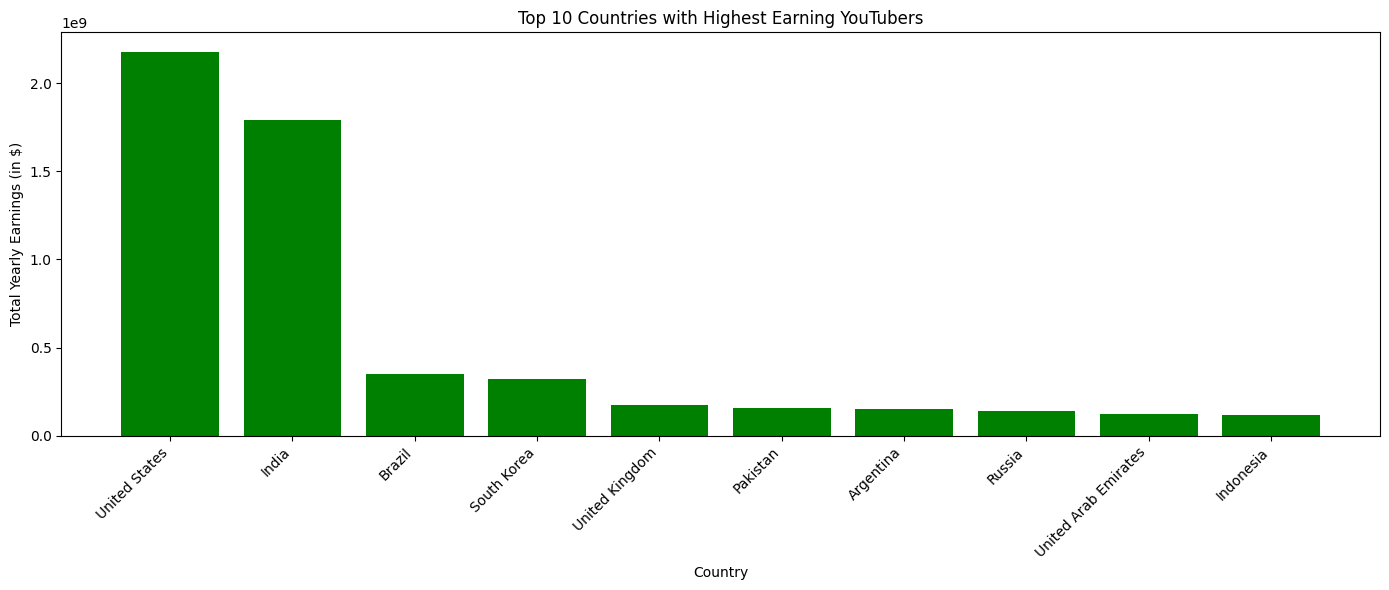

In [56]:
# Plot top 10 highest earning countries
plt.figure(figsize=(14, 6))
plt.bar(top_earning_countries['Country'], top_earning_countries['highest_yearly_earnings'], color='green')
plt.title('Top 10 Countries with Highest Earning YouTubers')
plt.xlabel('Country')
plt.ylabel('Total Yearly Earnings (in $)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Plot top 10 lowest earning countries
plt.figure(figsize=(14, 6))
plt.bar(lowest_earning_countries['Country'], lowest_earning_countries['lowest_yearly_earnings'], color='red')
plt.title('Top 10 Countries with Lowest Earning YouTubers')
plt.xlabel('Country')
plt.ylabel('Total Yearly Earnings (in $)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
# Get the top 10 countries by highest and lowest subscribers
top_subscriber_countries = subscribers_by_country.sort_values(by='subscribers', ascending=False).head(10)
lowest_subscriber_countries = subscribers_by_country.sort_values(by='subscribers', ascending=True).head(10)


In [ ]:
# Plot top 10 countries by subscribers
plt.figure(figsize=(14, 6))
plt.bar(top_subscriber_countries['Country'], top_subscriber_countries['subscribers'], color='blue')
plt.title('Top 10 Countries by YouTuber Subscribers')
plt.xlabel('Country')
plt.ylabel('Total Subscribers (in millions)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:

# Plot 10 countries with the lowest subscribers
plt.figure(figsize=(14, 6))
plt.bar(lowest_subscriber_countries['Country'], lowest_subscriber_countries['subscribers'], color='orange')
plt.title('Top 10 Countries with Lowest YouTuber Subscribers')
plt.xlabel('Country')
plt.ylabel('Total Subscribers (in millions)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

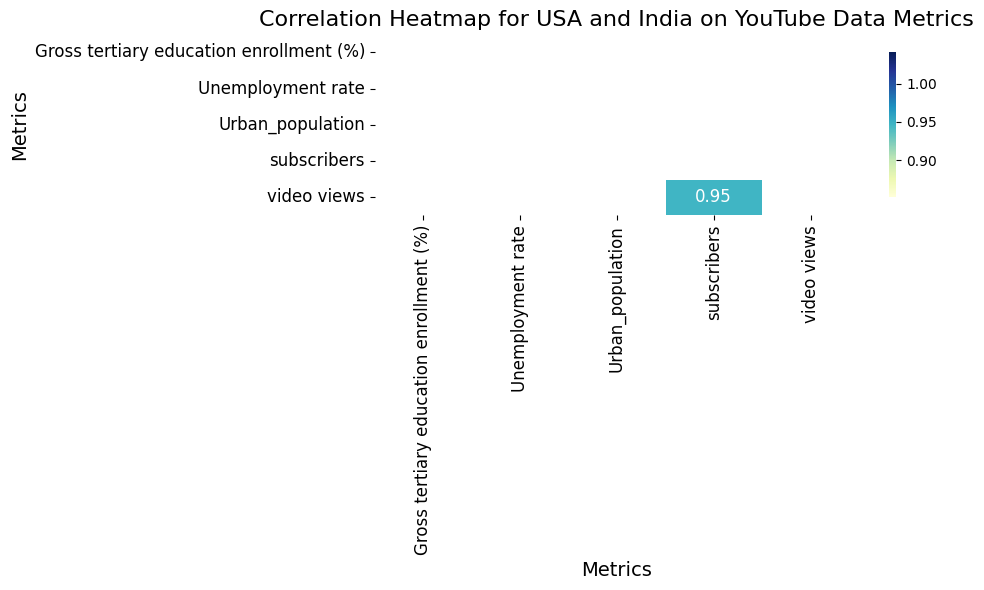

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'youtubers' is your DataFrame
# Filter the dataset for USA and India
countries = ['USA', 'India']
df_filtered = youtube[youtube['Country'].isin(countries)][['Country', 'Gross tertiary education enrollment (%)', 'Unemployment rate', 'Urban_population', 'subscribers', 'video views']]

# Set 'Country' as index for easier manipulation
df_filtered.set_index('Country', inplace=True)

# Calculate the correlation matrix for the filtered data
corr_matrix = df_filtered.corr()

# Mask the upper triangle (optional for cleaner visualization)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5, cbar_kws={'shrink': 0.8}, mask=mask, annot_kws={'size': 12})

# Add title and adjust font sizes
plt.title('Correlation Heatmap for USA and India on YouTube Data Metrics', fontsize=16)
plt.xlabel('Metrics', fontsize=14)
plt.ylabel('Metrics', fontsize=14)

# Adjust ticks for better readability
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()
